### Linear Regression Example ###

Modified from __Hands-on Learning using Sci-Kit Learn & Tensorflow__ by Geron.

## Data Science Process ##
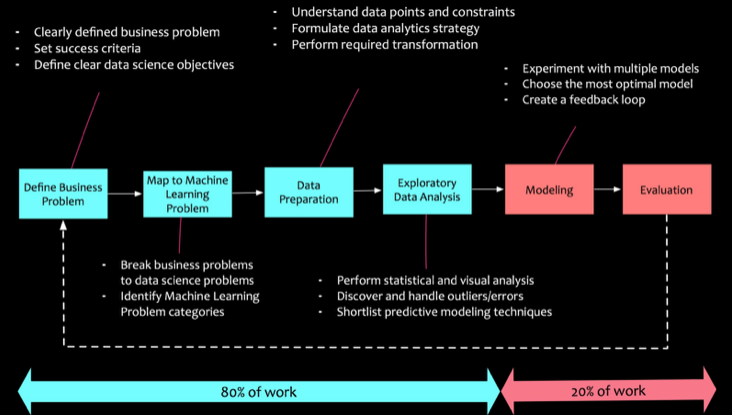

### Example Problem ###
We are going to build a model to predict life satisfaction from per capita GDP.

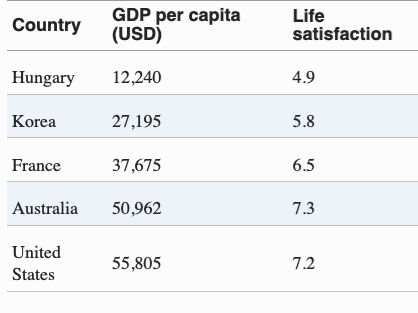

### Python and Jupyter Notebook Setup ###

In [2]:
# Import useful libraries
import os
import numpy as np
import pandas as pd
import sklearn.linear_model

In [3]:
# To plot pretty figures...
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Data Preparation Code ###

In [4]:
# function to join life satisfication data and GDP
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

### Load our data ###
We need to load and combine life satisfaction data and GDP data. (Code above joins this data)

In [5]:
# Set the path to our data location
datapath = os.path.join("datasets", "lifesat", "")
datapath

'datasets/lifesat/'

### Load the Life Satisfaction Data ###
This data is NOT in the format we need for our model.

This data is called the "Better Life Index" from Organisation for Economic Co-operation and Development (OECD) 

In [6]:
# Load the Life Satisfaction data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.00,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.00,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.20,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.43,NaN,NaN
3288,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.24,E,Estimated value
3289,RUS,Russia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.75,E,Estimated value
3290,SVN,Slovenia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.12,NaN,NaN


In [7]:
# Example of part of the data preparation code
oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.00,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.00,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.20,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.90,NaN,NaN
3214,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.48,E,Estimated value
3215,RUS,Russia,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.97,E,Estimated value
3216,SVN,Slovenia,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.62,NaN,NaN


### Load the GDP data ###
This data set is from the International Monetary Fund (IMF).  

This dataset contains Gross Domestic Product (GDP) per capita for some countries.

In [8]:
# Load the GDP data
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...,...
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0


### Put the data together and filter to relevant features ###
Finally, we will have the data we need for our model!

In [9]:
# Join the data together and only keep relavent features
#    Note: "prepare_country_stats" modifies tables as side effect
#.         This is bad programming because this means you cannot run this cell twice
#          without reexecuting all cells above.  
#          For convenience, we have not reimplemented the function, but use it as is.
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


### Examine your data ###

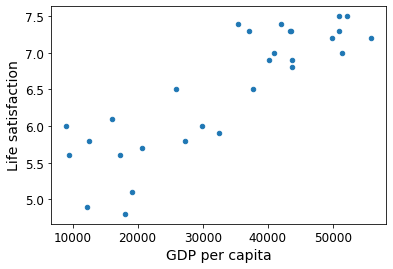

In [10]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

### Model Selection ###
It looks like a linear regresssion might work...

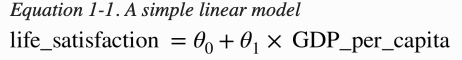

But what is the best line?

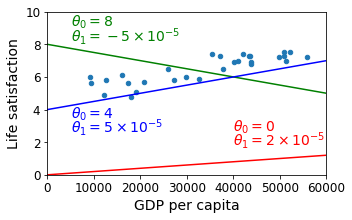

In [11]:
# Model Selection
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
plt.show()

### Figure out the best line ###
Let's build some training data.

In [12]:
# Prepare training data; X has inputs, Y has answers
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [13]:
X

array([[ 9054.914],
       [ 9437.372],
       [12239.894],
       [12495.334],
       [15991.736],
       [17288.083],
       [18064.288],
       [19121.592],
       [20732.482],
       [25864.721],
       [27195.197],
       [29866.581],
       [32485.545],
       [35343.336],
       [37044.891],
       [37675.006],
       [40106.632],
       [40996.511],
       [41973.988],
       [43331.961],
       [43603.115],
       [43724.031],
       [43770.688],
       [49866.266],
       [50854.583],
       [50961.865],
       [51350.744],
       [52114.165],
       [55805.204]])

In [14]:
y

array([[6. ],
       [5.6],
       [4.9],
       [5.8],
       [6.1],
       [5.6],
       [4.8],
       [5.1],
       [5.7],
       [6.5],
       [5.8],
       [6. ],
       [5.9],
       [7.4],
       [7.3],
       [6.5],
       [6.9],
       [7. ],
       [7.4],
       [7.3],
       [7.3],
       [6.9],
       [6.8],
       [7.2],
       [7.5],
       [7.3],
       [7. ],
       [7.5],
       [7.2]])

### Model selection ###

In [15]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

### Train the linear regression model with our specific training data ###

In [16]:
# Train the model
model.fit(X, y)

LinearRegression()

### Let's examine our thetas ###

In [17]:
# Show the computed parameters from the model "fit"
t0, t1 = model.intercept_[0], model.coef_[0][0]
t0, t1

(4.853052800266435, 4.911544589158485e-05)

### Parameterized model ###
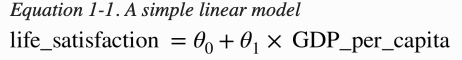

#### Life satisfaction = 4.85 + (4.91 × 10<sup>-5</sup>) * x ####


### Graph our prediction line ###

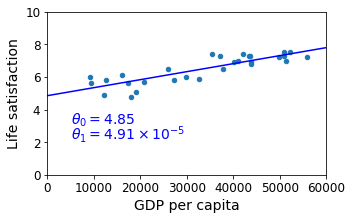

In [18]:
# plot the scatter plot of the sample data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)

# plot the predicted line
plt.plot(X, t0 + t1*X, "b")

# print the parameters of the model
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")

plt.show()

### Prediction ###

In [21]:
# Make a prediction for Cyprus
cyprus_gdp_per_capita = [[22587]]
print(f"Cyprus GDP per capita = ${cyprus_gdp_per_capita[0][0]:,}")

cyprus_predicted_life_satisfaction = model.predict(cyprus_gdp_per_capita)[0][0]
print(f"Predicted Cyprus Life Satisfaction = {cyprus_predicted_life_satisfaction}")

Cyprus GDP per capita = $22,587
Predicted Cyprus Life Satisfaction = 5.962423376619663


### Using the model to predict ###

#### Life satisfaction = 4.85 + (4.91 × 10<sup>-5</sup>) * x = 4.85 + (4.91 × 10<sup>-5</sup>) * 22,587 = 5.96 ####


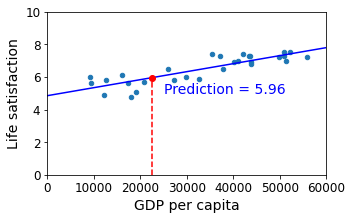

In [20]:
# plot the scatter plot of the sample data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)

# plot the predicted line
plt.plot(X, t0 + t1*X, "b")

# plot the predicted value
plt.plot([cyprus_gdp_per_capita[0][0], cyprus_gdp_per_capita[0][0]], [0, cyprus_predicted_life_satisfaction], "r--")
#plt.plot([0, cyprus_gdp_per_capita[0][0]], [cyprus_predicted_life_satisfaction, cyprus_predicted_life_satisfaction], "r--")

plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

plt.show()